# Classification on Thoracic Surgery Dataset
### 1.Importing Thoracic Surgery Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from scipy.io import arff
import seaborn as sns

#Importing Thoracic Surgery Dataset
dataset = arff.loadarff('ThoraricSurgery.arff')
data = pd.DataFrame(dataset[0])
print(data)
#X = DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60
datatype = np.array(['D','C','C','D','D','D','D','D','D','D','D','D','D','D','D','C'])
X = data.iloc[:, :16].values
Y = data.iloc[:, 16].values

         DGN  PRE4  PRE5     PRE6  PRE7  PRE8  PRE9 PRE10 PRE11    PRE14  \
0    b'DGN2'  2.88  2.16  b'PRZ1'  b'F'  b'F'  b'F'  b'T'  b'T'  b'OC14'   
1    b'DGN3'  3.40  1.88  b'PRZ0'  b'F'  b'F'  b'F'  b'F'  b'F'  b'OC12'   
2    b'DGN3'  2.76  2.08  b'PRZ1'  b'F'  b'F'  b'F'  b'T'  b'F'  b'OC11'   
3    b'DGN3'  3.68  3.04  b'PRZ0'  b'F'  b'F'  b'F'  b'F'  b'F'  b'OC11'   
4    b'DGN3'  2.44  0.96  b'PRZ2'  b'F'  b'T'  b'F'  b'T'  b'T'  b'OC11'   
..       ...   ...   ...      ...   ...   ...   ...   ...   ...      ...   
465  b'DGN2'  3.88  2.12  b'PRZ1'  b'F'  b'F'  b'F'  b'T'  b'F'  b'OC13'   
466  b'DGN3'  3.76  3.12  b'PRZ0'  b'F'  b'F'  b'F'  b'F'  b'F'  b'OC11'   
467  b'DGN3'  3.04  2.08  b'PRZ1'  b'F'  b'F'  b'F'  b'T'  b'F'  b'OC13'   
468  b'DGN3'  1.96  1.68  b'PRZ1'  b'F'  b'F'  b'F'  b'T'  b'T'  b'OC12'   
469  b'DGN3'  4.72  3.56  b'PRZ0'  b'F'  b'F'  b'F'  b'F'  b'F'  b'OC12'   

    PRE17 PRE19 PRE25 PRE30 PRE32   AGE Risk1Yr  
0    b'F'  b'F'  b'F'  b'T'  b'F'  60

### 2. Preprocessing the discrete data

In [2]:
# Preprocessing the discrete data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0,16):
    if datatype[i]=='D':
        X[:,i]  = labelencoder.fit_transform(X[:,i])

Y = labelencoder.fit_transform(Y)

### 3. Splitting encoded dataset into Training and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1111)

### 4. Feature Scaling

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 5. Model Selection

In [11]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=50)),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,10,20,30,50], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': [10,20,30,50]},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100, 200, 300, 400, 800]},
    'AdaBoostClassifier': {'n_estimators': [50,100, 200, 500, 600], 'learning_rate':[0.001,0.01,0.1,0.5,0.8],'base_estimator__criterion' : ['gini', 'entropy']},
    'LogisticRegression': {'max_iter':[100,130,140],'C': [0.1, 1, 10, 100], 'solver':['saga','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(30,20)],'activation':['tanh', 'relu']}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    np.random.seed(0);
    randcv = RandomizedSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3, n_iter=100)
    randcv.fit(X_train, Y_train)
    Y_pred = randcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(f1_score(Y_test, Y_pred, average='micro'),3)
    print("f1_score for " + names[counter] + ":",accuracy[counter])

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for KNeighborsClassifier: 0.844


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for SVC: 0.844


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for DecisionTreeClassifier: 0.709


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for RandomForestClassifier: 0.858


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for AdaBoostClassifier: 0.702


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for LogisticRegression: 0.844


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for GaussianNB: 0.844


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


f1_score for MLPClassifier: 0.844


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Thoracic Surgery Dataset dataset models accuracy')

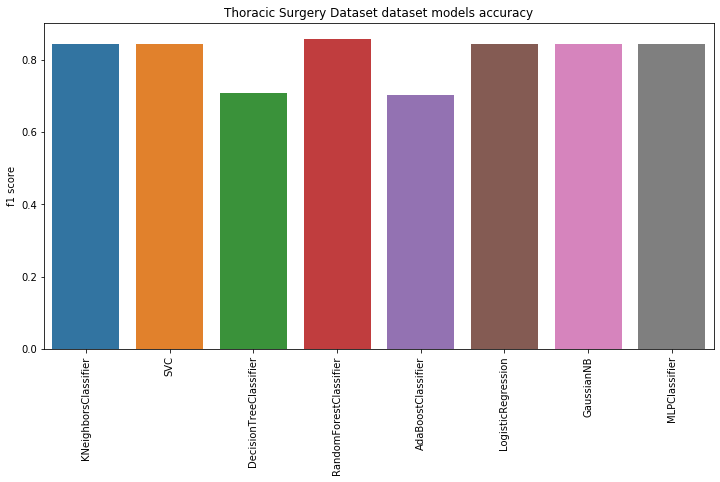

In [12]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('f1 score')
plt.title('Thoracic Surgery Dataset dataset models accuracy')